Importing the Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv("C:/Users/shrut/OneDrive/Desktop/creditcard.csv")

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
#distribution of legit transactions & fraudulent transaction
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

0=Normal transactions

1=fraud transactions

This Dataset is highly unblanced

In [10]:
#seprating the data for analysis
legit=df[df.Class==0]
fraud=df[df.Class==1]

print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [11]:
#statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [12]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
#compare the values for both the transaction
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under-Sampling

Build a sample dataset containing similer distribution of normal transactions and fraudulent transactions

Number of Fraudulent Transactions---->492

In [14]:
legit_sample=legit.sample(n=492)


Concatenating two DataFrames

In [17]:
new_data= pd.concat([legit_sample , fraud], axis=0)

In [18]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
27645,34641.0,1.104349,-0.403658,0.894701,0.011116,-1.151600,-0.768846,-0.431250,-0.078089,0.627611,...,0.020467,-0.093720,0.018105,0.455970,0.006498,0.951104,-0.063710,0.030710,82.25,0
206933,136447.0,-3.427157,2.476703,-0.745743,-2.175976,-2.329106,-1.241120,-1.641918,2.376286,0.449731,...,0.025457,-0.633214,0.064569,0.037318,0.525830,-0.375348,-0.875817,-0.212606,5.30,0
233736,147684.0,1.997776,-0.662821,-0.631958,-1.393261,-0.879245,-1.249351,-0.325364,-0.273472,1.955280,...,-0.195004,-0.370413,0.332254,0.060346,-0.395048,-0.569583,0.026923,-0.030363,38.67,0
42059,40941.0,0.611036,-0.912821,0.821218,1.189988,-0.837744,0.633566,-0.392049,0.160712,0.241611,...,0.438598,0.682468,-0.452607,-0.445368,0.372093,-0.239273,0.022472,0.078241,300.00,0
8633,11666.0,-1.459568,-0.200962,0.868380,-3.628654,1.981677,3.123284,-0.791299,1.035140,2.720344,...,0.003939,0.316935,-0.370369,0.996390,0.663673,-0.013818,0.405923,0.219427,45.39,0


In [19]:
new_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [20]:
new_data['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [21]:
new_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94647.215447,-0.145147,-0.077747,0.093522,0.039420,0.016956,-0.058364,0.095739,0.009327,0.019766,...,0.041789,-0.012008,-0.048470,-0.017010,-0.011245,-0.013789,-0.029656,-0.011993,-0.025669,104.365386
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Spliting the data into Features & Target

In [22]:
x = new_data.drop(columns='Class' , axis=1)
y = new_data['Class']

In [31]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
27645,34641.0,1.104349,-0.403658,0.894701,0.011116,-1.151600,-0.768846,-0.431250,-0.078089,0.627611,...,0.112481,0.020467,-0.093720,0.018105,0.455970,0.006498,0.951104,-0.063710,0.030710,82.25
206933,136447.0,-3.427157,2.476703,-0.745743,-2.175976,-2.329106,-1.241120,-1.641918,2.376286,0.449731,...,-0.412588,0.025457,-0.633214,0.064569,0.037318,0.525830,-0.375348,-0.875817,-0.212606,5.30
233736,147684.0,1.997776,-0.662821,-0.631958,-1.393261,-0.879245,-1.249351,-0.325364,-0.273472,1.955280,...,-0.064813,-0.195004,-0.370413,0.332254,0.060346,-0.395048,-0.569583,0.026923,-0.030363,38.67
42059,40941.0,0.611036,-0.912821,0.821218,1.189988,-0.837744,0.633566,-0.392049,0.160712,0.241611,...,0.594357,0.438598,0.682468,-0.452607,-0.445368,0.372093,-0.239273,0.022472,0.078241,300.00
8633,11666.0,-1.459568,-0.200962,0.868380,-3.628654,1.981677,3.123284,-0.791299,1.035140,2.720344,...,0.282149,0.003939,0.316935,-0.370369,0.996390,0.663673,-0.013818,0.405923,0.219427,45.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [29]:
y

27645     0
206933    0
233736    0
42059     0
8633      0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

Split the data into training and testing data

In [26]:
x_train , x_test,y_train,_y_test= train_test_split(x , y , test_size=0.2 , random_state=2)

In [27]:
x_train.shape , x_test.shape,y_train.shape,_y_test.shape

((787, 30), (197, 30), (787,), (197,))

Training the model

Logistic Regression

In [34]:
algo=LogisticRegression()

In [35]:
algo.fit(x_train , y_train)

C:\Users\shrut\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
y_train_prediction= algo.predict(x_train)

In [36]:
y_test_prediction=algo.predict(x_test)

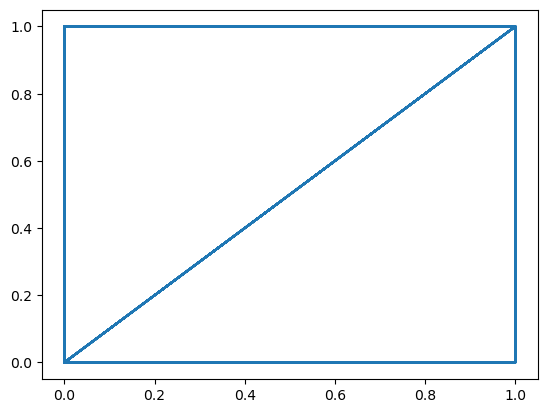

In [39]:
plt.plot(_y_test , y_test_prediction)

In [42]:
train_score=algo.score(x_train , y_train)
print("Acuracy on training data : " ,train_score )

Acuracy on training data :  0.9428208386277002


In [46]:
test_score=algo.score(x_test, _y_test)
print("Acuracy on testing data : " ,test_score )

Acuracy on testing data :  0.9289340101522843


Predictive system

In [53]:
input_data=(411,0.238849265006397,0.241701891642487,0.369160517114791,-2.12404122740141,-0.172507581507829,-0.838344862229908,0.183133472976724,-0.921449249946025,0.517945477228418,-1.21503784918733,1.92025650039634,1.44127412040446,-0.222390940908257,0.769624357692187,0.665069188986957,-0.776718204254204,-0.0366601687075306,-0.352461245226436,0.241211828520132,-0.268390116771408,0.846543762084254,0.0473652477986407,-0.162209811997851,0.284052803325962,0.77300432187726,-0.0348584762343811,0.153185472922438,0.207923528481533,10)
input_data_np= np.asarray(input_data)
input_data_reshape=input_data_np.reshape(1,-1)
prediction=algo.predict(input_data_reshape)
print(prediction)
if(prediction[0]==0):
    print("The Transactions are safe")
else:
    print("The Transactions are fraud ")


[0]
The Transactions are safe


C:\Users\shrut\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
